In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [2]:
#read data
train_data = pd.read_csv("Training.csv").drop(columns=["Unnamed: 133"], errors="ignore")
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

In [ ]:
# Feature selection
X = train_data.drop(columns=["prognosis"])
y = train_data["prognosis"]  

# Test dataset
P = test_data.drop(columns=["prognosis"])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24, stratify=y)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

## KNN

In [4]:
# ______ Εκπαίδευση KNN _____

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)

# Predictions
training_knn = knn.predict(X_train)
testing_knn = knn.predict(X_test)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_knn):.2f}')
print(f'Precision: {precision_score(y_train, training_knn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_knn, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_knn))

# Evaluate on test set
print("\nMetrics on ---Test Set ----")
print(f'Accuracy: {accuracy_score(y_test, testing_knn):.2f}')
print(f'Precision: {precision_score(y_test, testing_knn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_test, testing_knn, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_test, testing_knn))

# cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} and standard deviation: {cv_scores.std():.2f}") 

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Test Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Cross-validation accuracy: 1.00 and 0.00


## Decision Tree

In [5]:
# ______ Εκπαίδευση Decision Tree _____
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
training_dc = decision_tree.predict(X_train)
testing_dc = decision_tree.predict(X_test)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_dc):.2f}')
print(f'Precision: {precision_score(y_train, training_dc, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_dc, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_dc))

# Evaluate on test set
print("\nMetrics on ---Test Set ----")
print(f'Accuracy: {accuracy_score(y_test, testing_dc):.2f}')
print(f'Precision: {precision_score(y_test, testing_dc, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_test, testing_dc, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_test, testing_dc))

# cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} and standard deviation: {cv_scores.std():.2f}")

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Test Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Cross-validation accuracy: 1.00 and 0.00


## Random Forest 

In [6]:
# _____ Εκπαίδευση Random Forest _____
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
training_rf = random_forest.predict(X_train)
testing_rf = random_forest.predict(X_test)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_rf):.2f}')
print(f'Precision: {precision_score(y_train, training_rf, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_rf, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_rf))

# Evaluate on test set
print("\nMetrics on ---Test Set ----")
print(f'Accuracy: {accuracy_score(y_test, testing_rf):.2f}')
print(f'Precision: {precision_score(y_test, testing_rf, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_test, testing_rf, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_test, testing_rf))

# cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} and standard deviation: {cv_scores.std():.2f}")

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Test Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Cross-validation accuracy: 1.00 and 0.00


## SVM

In [7]:
# Support Vector Machine 
# Εκπαίδευση SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predictions
training_svm = svm.predict(X_train)
testing_svm = svm.predict(X_test)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_svm):.2f}')
print(f'Precision: {precision_score(y_train, training_svm, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_svm, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_svm))

# Evaluate on test set
print("\nMetrics on ---Test Set ----")
print(f'Accuracy: {accuracy_score(y_test, testing_svm):.2f}')
print(f'Precision: {precision_score(y_test, testing_svm, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_test, testing_svm, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_test, testing_svm))

# cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} and standard deviation: {cv_scores.std():.2f}")

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Test Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Cross-validation accuracy: 1.00 and 0.00


## MLP

In [8]:
# _____ MLP _____
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

mlp.fit(X_train, y_train)

# Predictions
training_mlp = mlp.predict(X_train)
testing_mlp = mlp.predict(X_test)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_mlp):.2f}')
print(f'Precision: {precision_score(y_train, training_mlp, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_mlp, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_mlp))

# Evaluate on test set
print("\nMetrics on ---Test Set ----")
print(f'Accuracy: {accuracy_score(y_test, testing_mlp):.2f}')
print(f'Precision: {precision_score(y_test, testing_mlp, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_test, testing_mlp, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_test, testing_mlp))

# cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} and standard deviation: {cv_scores.std():.2f}")

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Test Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Cross-validation accuracy: 1.00 and 0.00


## CNN

In [9]:
#______CNN_______

# Features and labels (with prognosis as values)
X = train_data.drop(columns=["prognosis"]).values 
y = train_data["prognosis"].values 

# Encode labels as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  # Convert labels to one-hot encoding

# Reshape input for CNN (3D input: samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

# CNN Model
cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

# Predictions
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_true_classes)

# Classification Report
#print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


C:\Users\evage\anaconda3\envs\clean_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8157 - loss: 0.8558 - val_accuracy: 0.5691 - val_loss: 1.8795
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9917 - loss: 0.0235 - val_accuracy: 0.9980 - val_loss: 0.0150
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9928 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 8.8204e-05
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9948 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 2.5034e-06
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 1.0000 - val_loss: 3.9662e-07
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 1.6401e-06
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 8.3808e-06
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9967 - los

## Testing of models and Confusion Matrices

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=90)  # Rotate labels for better readability if needed
    plt.yticks(rotation=0)
    plt.show()

KNN Precision: 1.00


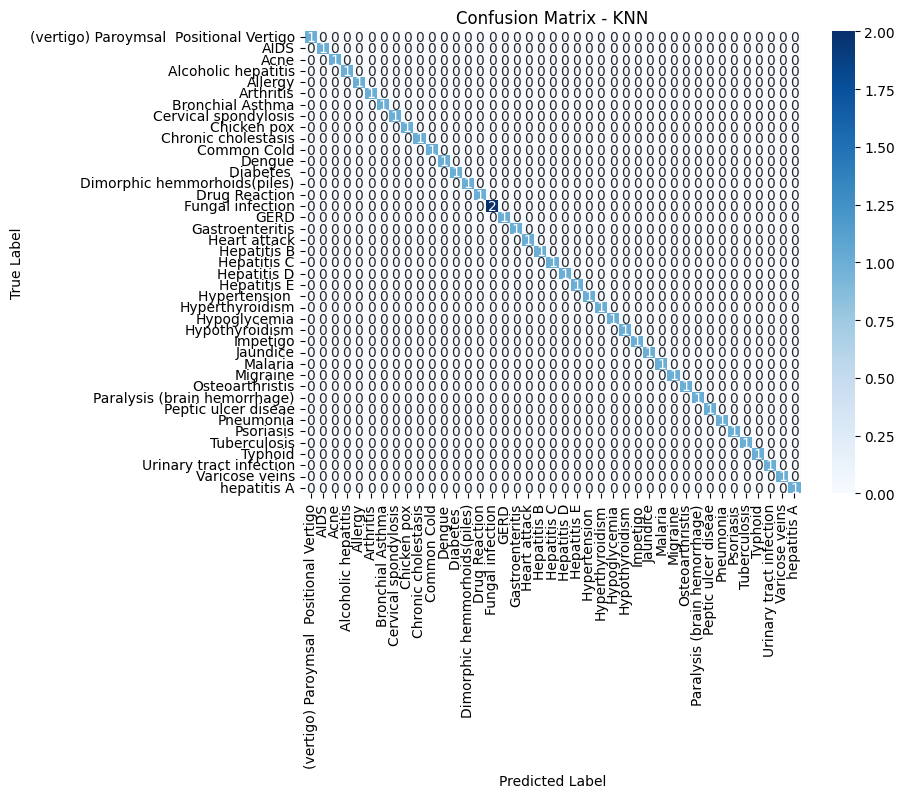

In [12]:
# Calculate Precision
y_pred_knn = knn.predict(P)

precision_knn = precision_score(test_data["prognosis"], y_pred_knn, average='weighted', zero_division=1)
print(f"KNN Precision: {precision_knn:.2f}")

# Plot Confusion Matrix for KNN
plot_confusion_matrix(test_data["prognosis"], y_pred_knn, "KNN")

Decision Tree Precision: 0.99


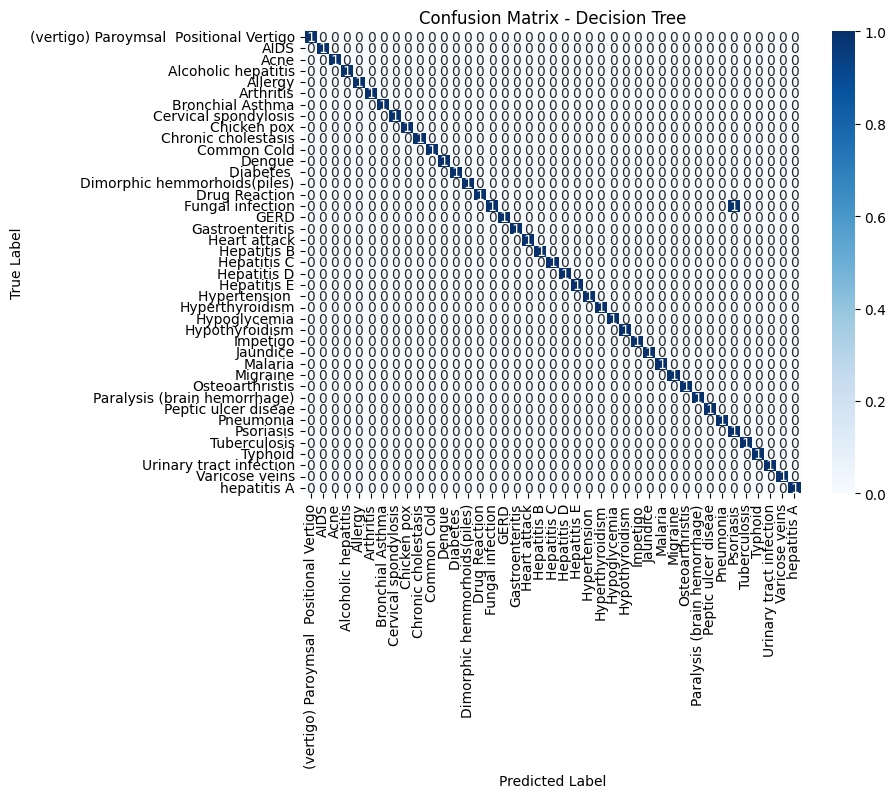

In [13]:
# Calculate Precision in Test set
y_pred_dt = decision_tree.predict(P)

precision_dt = precision_score(test_data["prognosis"], y_pred_dt, average='weighted', zero_division=1)
print(f"Decision Tree Precision: {precision_dt:.2f}")

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix(test_data["prognosis"], y_pred_dt, "Decision Tree")

Random Forest Precision: 0.99


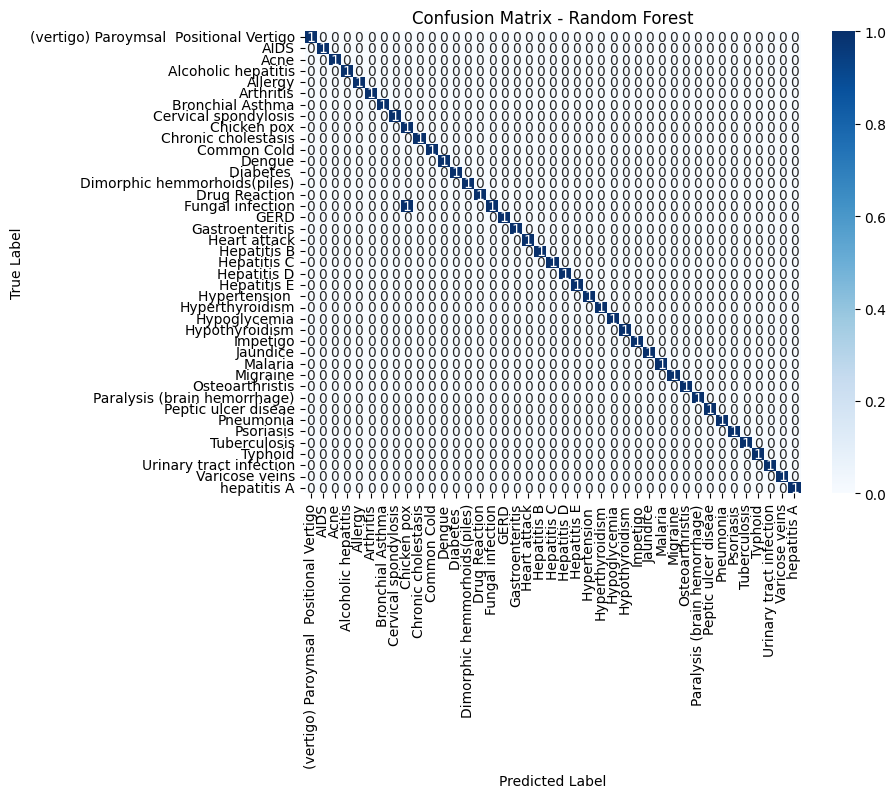

In [14]:
# Calculate Precision in Test set
y_pred_rf = random_forest.predict(P)

precision_rf = precision_score(test_data["prognosis"], y_pred_rf, average='weighted', zero_division=1)
print(f"Random Forest Precision: {precision_rf:.2f}")

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(test_data["prognosis"], y_pred_rf, "Random Forest")

:Support Vector Machine Precision 1.00


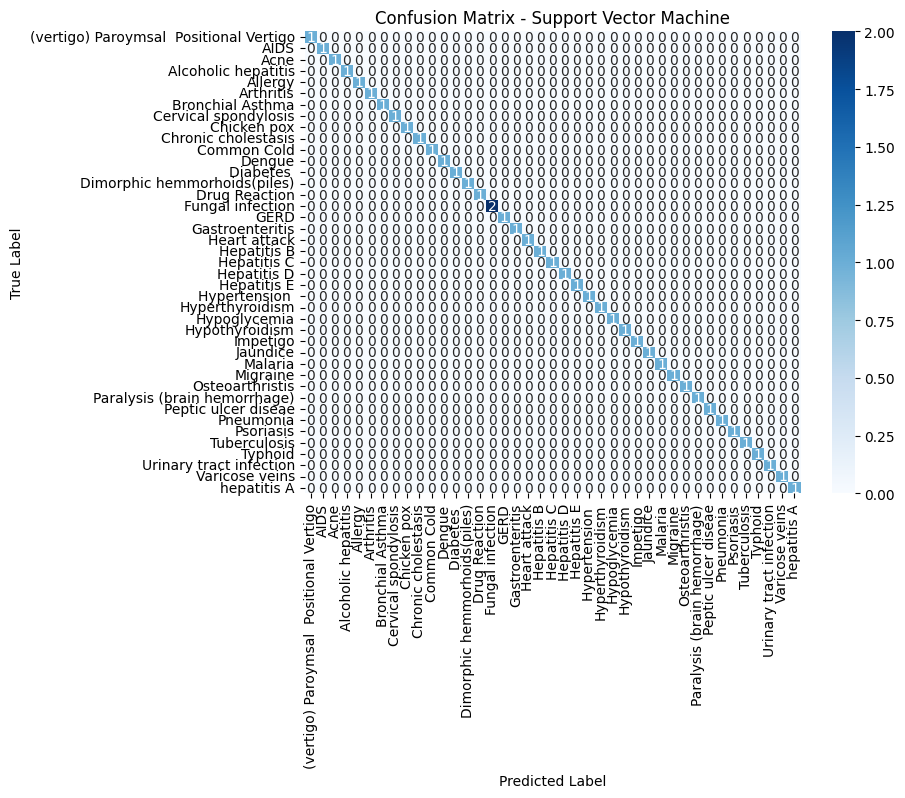

In [17]:
# Calculate Precision in Test set
y_pred_svm = svm.predict(P)

precision_svm = precision_score(test_data["prognosis"], y_pred_svm, average='weighted', zero_division=1)
print(f":Support Vector Machine Precision {precision_svm:.2f}")

# Plot Confusion Matrix for SVM
plot_confusion_matrix(test_data["prognosis"], y_pred_svm, "Support Vector Machine")

MLP Precision: 0.99


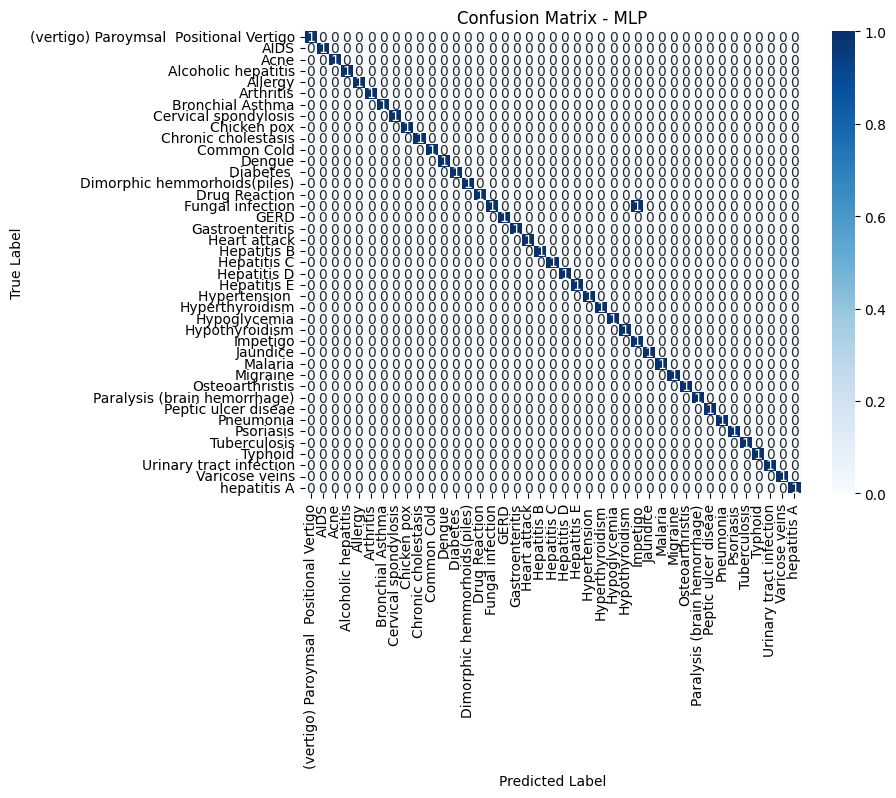

In [18]:
# Calculate Precision in Test set
y_pred_mlp = mlp.predict(P)

precision_mlp = precision_score(test_data["prognosis"], y_pred_mlp, average='weighted', zero_division=1)
print(f"MLP Precision: {precision_mlp:.2f}")

# Plot Confusion Matrix for MLP
plot_confusion_matrix(test_data["prognosis"], y_pred_mlp, "MLP")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
CNN Precision: 0.99


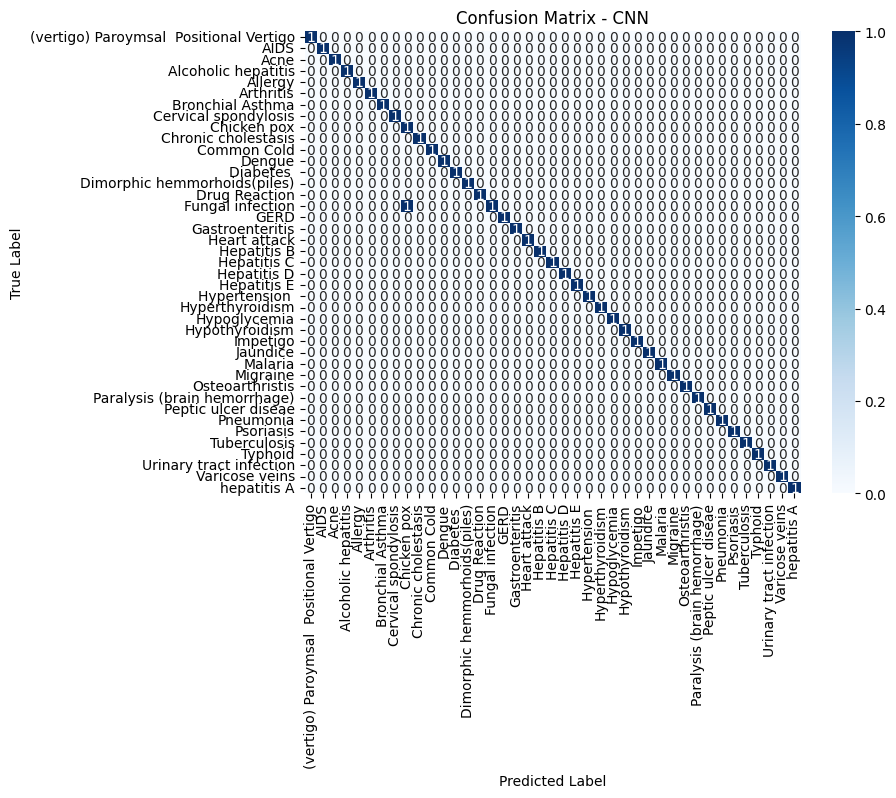

In [23]:
# Function to plot confusion matrix for CNN
def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
    
# Extract test features
P = test_data.drop(columns=["prognosis"]).values  
P = np.expand_dims(P, axis=-1)  

# Predict probabilities
y_pred_cnn = cnn.predict(P)

# Convert probabilities to class labels (numeric indices)
y_pred_indices = np.argmax(y_pred_cnn, axis=1)  

# Convert true labels to numeric 
if isinstance(test_data["prognosis"].iloc[0], str):  
    y_true_labels = label_encoder.transform(test_data["prognosis"])  # Convert true labels to numeric
    y_pred_labels = y_pred_indices  # CNN predictions are already numeric
else:
    y_true_labels = test_data["prognosis"]  # Use directly if already numeric
    y_pred_labels = y_pred_indices  # Keep numeric format

# Calculate Precision
precision_cnn = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=1)
print(f"CNN Precision: {precision_cnn:.2f}")

# Get class labels for the plot (original class names)
if isinstance(test_data["prognosis"].iloc[0], str):  
    class_labels = label_encoder.classes_  # Use original string labels
else:
    class_labels = np.unique(y_true_labels)  # Use numeric labels if not encoded

# Plot Confusion Matrix for CNN
plot_confusion_matrix(y_true_labels, y_pred_labels, "CNN", class_labels)

# Save Pre-trained model

In [22]:
import joblib

# store the pre-trained KNN  model
joblib.dump(knn, 'knn.joblib')
print("Το μοντέλο αποθηκεύτηκε επιτυχώς")

# loan of stored model
knn_loaded = joblib.load('knn.joblib')
print("Το μοντέλο φορτώθηκε επιτυχώς")

Το μοντέλο αποθηκεύτηκε επιτυχώς
Το μοντέλο φορτώθηκε επιτυχώς
